The problem statement is to predict whether the person is having diabetes or not.
The solution of this statement is to take input from the user score of their Glucose,
Blood Pressure, Skin Thickness, Insulin, BMI(Body Mass Index), Diabetes Pedigree Function and Age.
The first step is to load the dataset, Preprocess the data, Perform EDA on the data,
Include the new feature from the existing feature, Train and Test The Model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"C:\Users\desai\Downloads\archive (5)\Healthcare-Diabetes.csv")

In [3]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

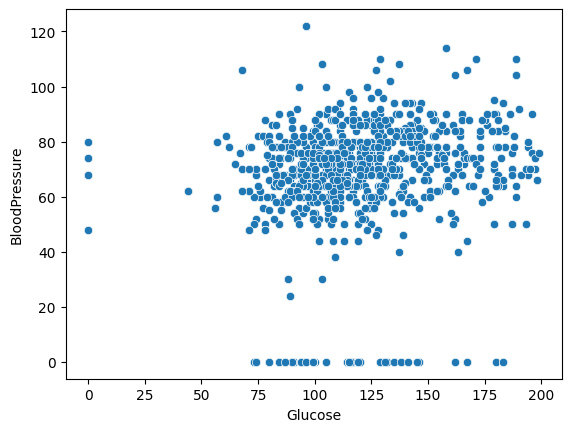

In [5]:
sns.scatterplot(x=data["Glucose"],y=data["BloodPressure"])
plt.show()

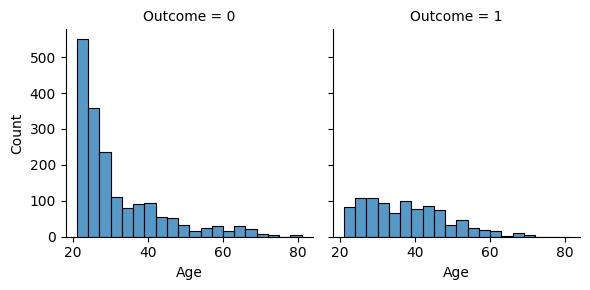

In [6]:
sns.displot(data,x="Age",col="Outcome",binwidth=3,height=3,facet_kws=dict(margin_titles=True))
plt.show()

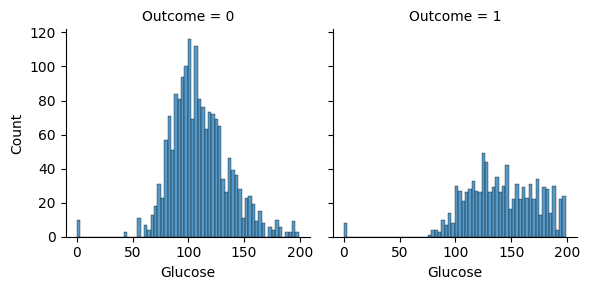

In [7]:
sns.displot(data,x="Glucose",col="Outcome",binwidth=3,height=3,facet_kws=dict(margin_titles=True))
plt.show()

In [8]:
data.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
main_col_data=pd.DataFrame({
    "Glucose":data["Glucose"],
    "Blood Pressure":data["BloodPressure"],
    "Skin Thickness":data["SkinThickness"],
    "Body Mass index":data["BMI"],
    "Age":data["Age"],
    "Diabetes":data["DiabetesPedigreeFunction"],
    "Outcome":data["Outcome"]
})

In [10]:
main_col_data

,Glucose,Blood Pressure,Skin Thickness,Body Mass index,Age,Diabetes,Outcome
0,148,72,35,33.6,50,0.627,1
1,85,66,29,26.6,31,0.351,0
2,183,64,0,23.3,32,0.672,1
3,89,66,23,28.1,21,0.167,0
4,137,40,35,43.1,33,2.288,1
...,...,...,...,...,...,...,...
2763,75,64,24,29.7,33,0.370,0
2764,179,72,42,32.7,36,0.719,1
2765,85,78,0,31.2,42,0.382,0
2766,129,110,46,67.1,26,0.319,1


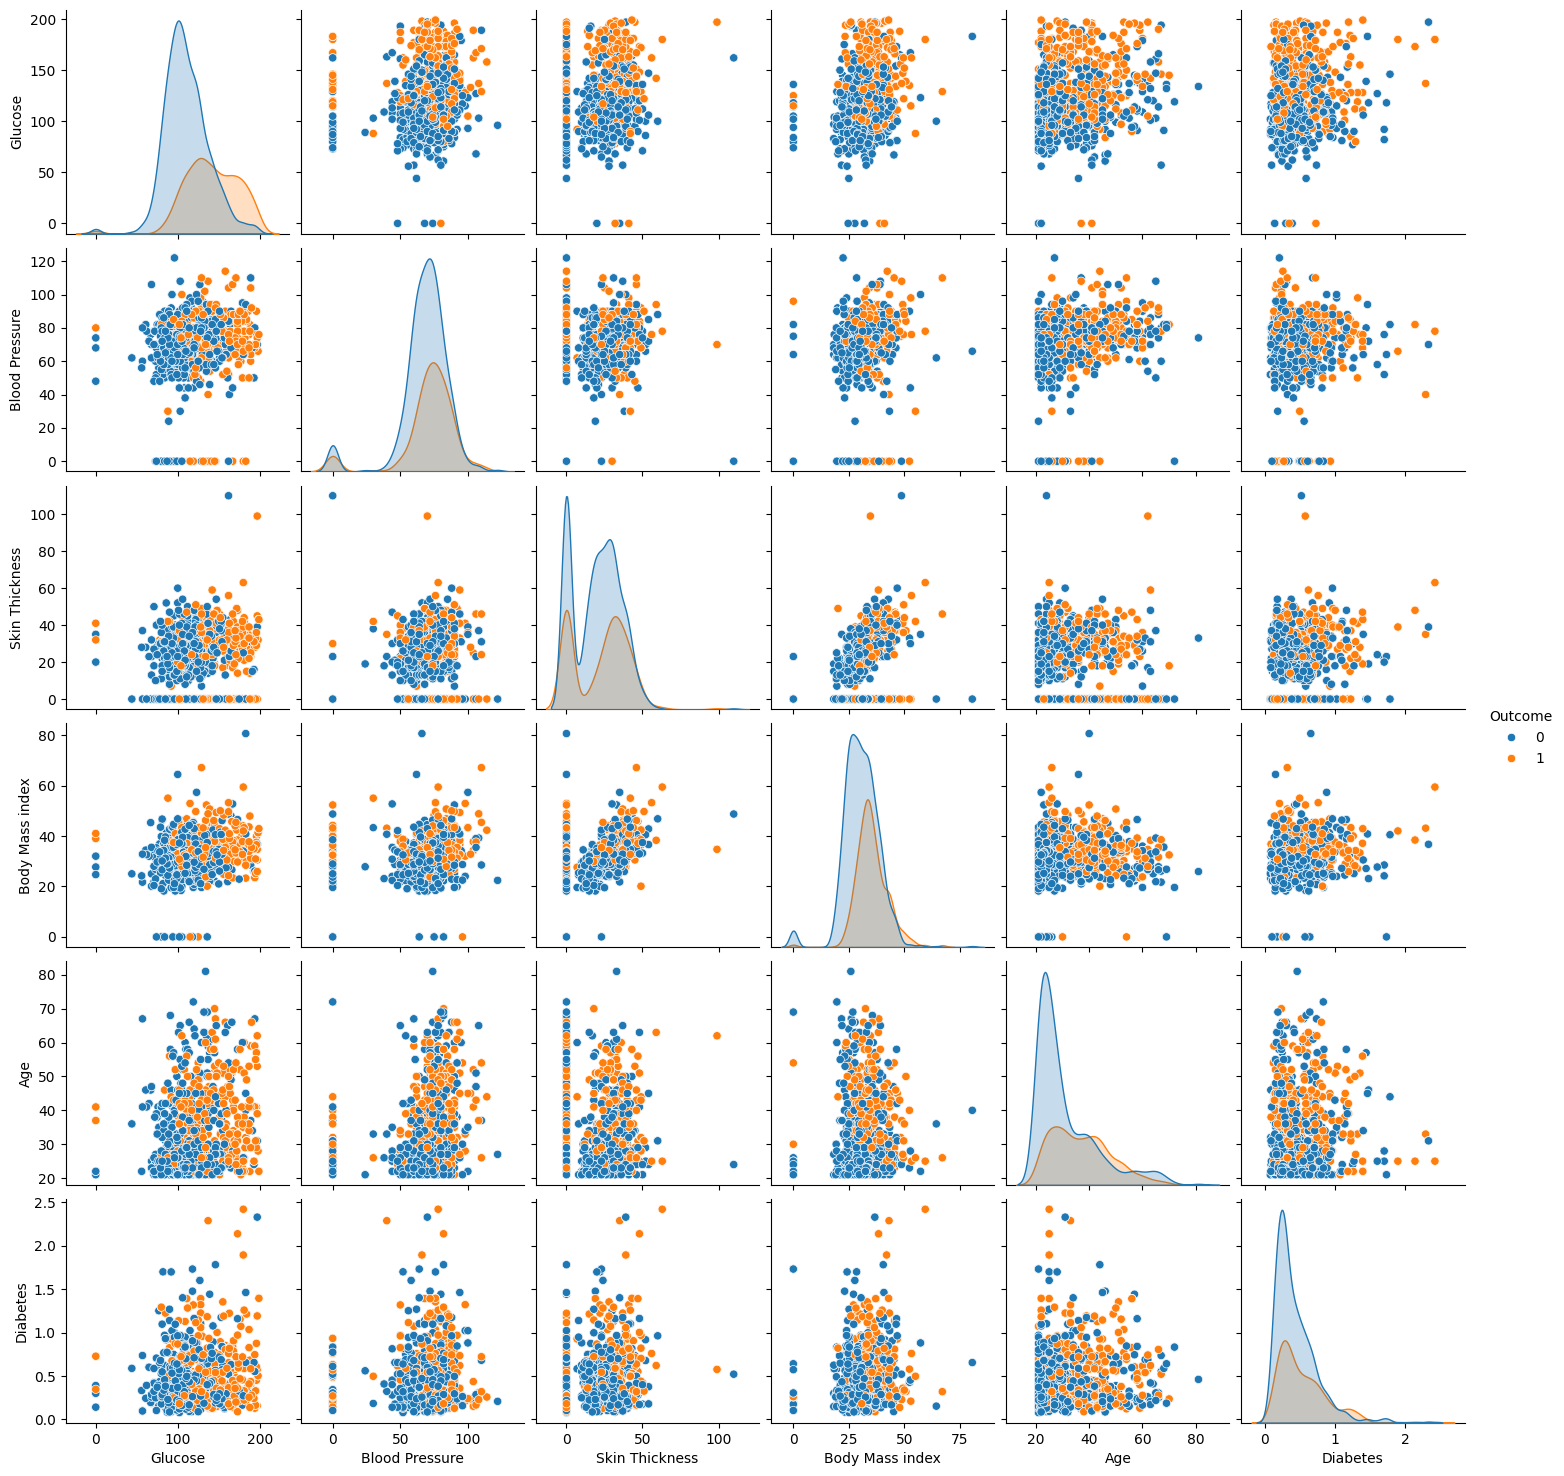

In [11]:
sns.pairplot(main_col_data,hue="Outcome")
plt.show()

In [12]:
data["Outcome"].shape

(2768,)

In [13]:
data["DiabetesPedigreeFunction"].value_counts()

DiabetesPedigreeFunction
0.258    22
0.207    20
0.268    18
0.238    18
0.261    18
         ..
0.487     1
0.451     1
0.388     1
0.351     1
0.627     1
Name: count, Length: 523, dtype: int64

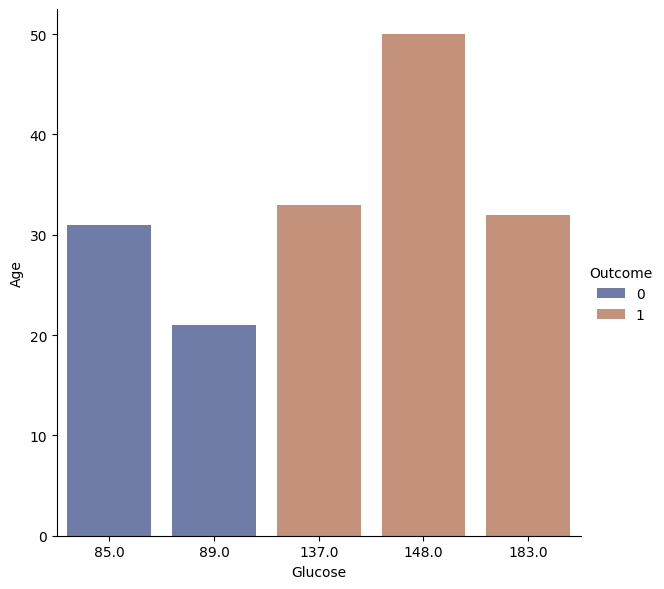

In [14]:
sns.catplot(kind="bar",x=data["Glucose"].head(),y=data["Age"],hue=data["Outcome"],errorbar="sd", palette="dark", alpha=.6,height=6)
plt.show()

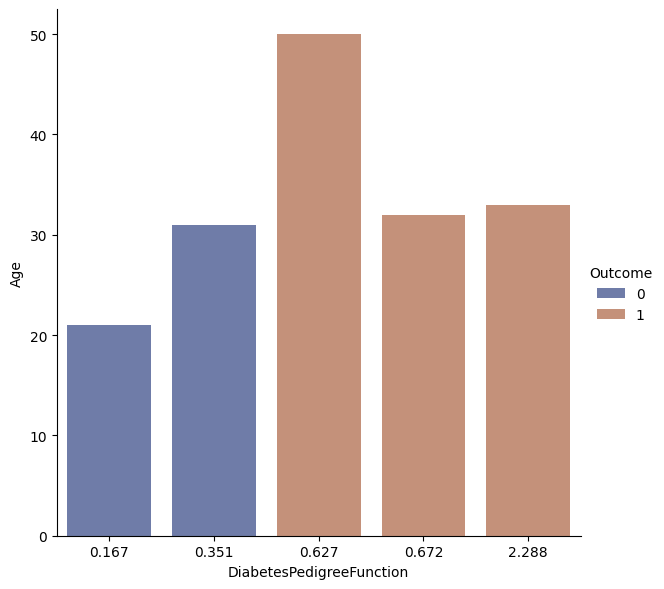

In [15]:
sns.catplot(kind="bar",x=data["DiabetesPedigreeFunction"].head(),y=data["Age"],hue=data["Outcome"],errorbar="sd", palette="dark", alpha=.6,height=6)
plt.show()

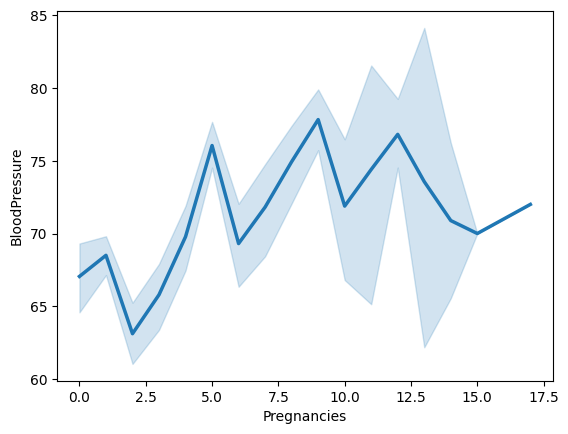

In [16]:
sns.lineplot(x=data["Pregnancies"],y=data["BloodPressure"],linewidth=2.5)
plt.show()

In [17]:
corr_value=pd.DataFrame(data).corr(numeric_only=True)

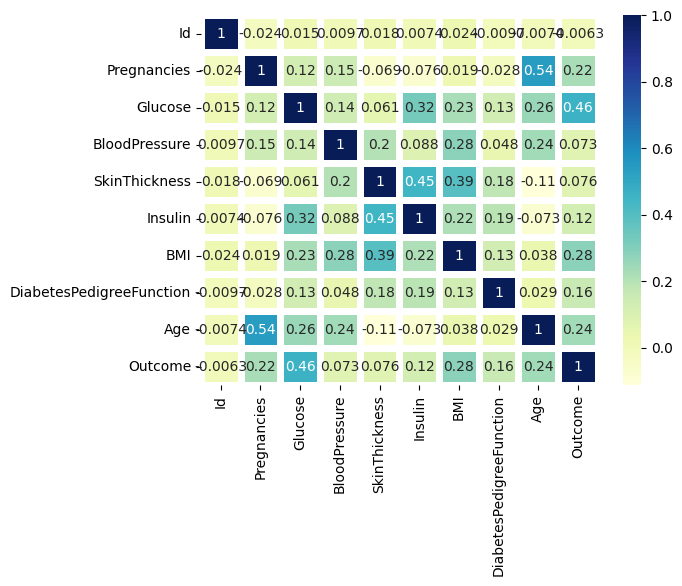

In [18]:
sns.heatmap(corr_value,cmap="YlGnBu",annot=True,linewidths=5)
plt.show()

In [19]:
data.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
num_col=pd.DataFrame({
    "Pregnancy":data["Pregnancies"],
    "Glucose":data["Glucose"],
    "Blood Pressure":data["BloodPressure"],
    "Skin Thickness":data["SkinThickness"],
    "Insulin":data["Insulin"],
    "Body Mass Index":data["BMI"],
    "Diabetes Percentage":data["DiabetesPedigreeFunction"],
    "Age":data["Age"]
})

In [21]:
num_col

,Pregnancy,Glucose,Blood Pressure,Skin Thickness,Insulin,Body Mass Index,Diabetes Percentage,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [22]:
x=num_col

In [23]:
x

,Pregnancy,Glucose,Blood Pressure,Skin Thickness,Insulin,Body Mass Index,Diabetes Percentage,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [24]:
y=data["Outcome"]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [26]:
logistic_model=LogisticRegression()

In [27]:
logistic_model.fit(x,y)

C:\Users\desai\anaconda3\envs\django_prac2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
pred_class=logistic_model.predict(x)

In [29]:
accuracy = accuracy_score(y,pred_class)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 78.14 %.


In [30]:
cm=confusion_matrix(y,pred_class)

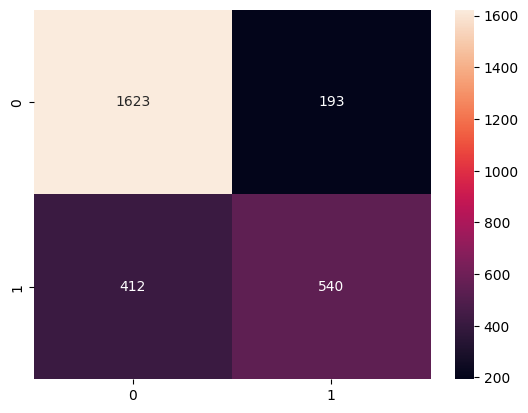

In [31]:
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

In [32]:
y_true=y
y_pred=logistic_model.predict(x)

In [33]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1816
           1       0.74      0.57      0.64       952

    accuracy                           0.78      2768
   macro avg       0.77      0.73      0.74      2768
weighted avg       0.78      0.78      0.77      2768



In [59]:
clf=tree.DecisionTreeClassifier()

In [60]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_clf_pred=clf.predict(x_train)

In [62]:
accuracy = accuracy_score(y_train,y_clf_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [67]:
data.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
num_cols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [69]:
num_transfromer_dict={}
for col in num_cols:
    num_transfromer_dict[col]=StandardScaler().fit(data[[col]])

In [70]:
x_cols=num_cols
x_raw_feature=data[x_cols]

In [71]:
x_raw_feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [72]:
for transforemer_name,transforemer in num_transfromer_dict.items():
    x_raw_feature[f"{transforemer_name}_num_transformation"] = transforemer.transform(x_raw_feature[[transforemer_name]])

C:\Users\desai\AppData\Local\Temp\ipykernel_6088\1391451259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_raw_feature[f"{transforemer_name}_num_transformation"] = transforemer.transform(x_raw_feature[[transforemer_name]])


In [73]:
x_raw_feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_num_transformation,Glucose_num_transformation,BloodPressure_num_transformation,SkinThickness_num_transformation,Insulin_num_transformation,BMI_num_transformation,DiabetesPedigreeFunction_num_transformation,Age_num_transformation
0,6,148,72,35,0,33.6,0.627,50,0.679232,0.839738,0.149033,0.882845,-0.713633,0.181135,0.478509,1.432495
1,1,85,66,29,0,26.6,0.351,31,-0.825341,-1.127124,-0.163012,0.509169,-0.713633,-0.685773,-0.369130,-0.181079
2,8,183,64,0,0,23.3,0.672,32,1.281062,1.932439,-0.267027,-1.296931,-0.713633,-1.094459,0.616712,-0.096154
3,1,89,66,23,94,28.1,0.167,21,-0.825341,-1.002244,-0.163012,0.135494,0.123547,-0.500007,-0.934224,-1.030329
4,0,137,40,35,168,43.1,2.288,33,-1.126256,0.496317,-1.515209,0.882845,0.782604,1.357654,5.579704,-0.011229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,-0.524427,-1.439324,-0.267027,0.197773,-0.223793,-0.301857,-0.310778,-0.011229
2764,8,179,72,42,130,32.7,0.719,36,1.281062,1.807558,0.149033,1.318801,0.444170,0.069676,0.761056,0.243546
2765,6,85,78,0,0,31.2,0.382,42,0.679232,-1.127124,0.461079,-1.296931,-0.713633,-0.116090,-0.273925,0.753095
2766,0,129,110,46,130,67.1,0.319,26,-1.126256,0.246557,2.125322,1.567918,0.444170,4.329913,-0.467408,-0.605704


In [74]:
x= x_raw_feature[[col for col in x_raw_feature if col.endswith("_num_transformation")]]

In [75]:
x.head()

,Pregnancies_num_transformation,Glucose_num_transformation,BloodPressure_num_transformation,SkinThickness_num_transformation,Insulin_num_transformation,BMI_num_transformation,DiabetesPedigreeFunction_num_transformation,Age_num_transformation
0,0.679232,0.839738,0.149033,0.882845,-0.713633,0.181135,0.478509,1.432495
1,-0.825341,-1.127124,-0.163012,0.509169,-0.713633,-0.685773,-0.369130,-0.181079
2,1.281062,1.932439,-0.267027,-1.296931,-0.713633,-1.094459,0.616712,-0.096154
3,-0.825341,-1.002244,-0.163012,0.135494,0.123547,-0.500007,-0.934224,-1.030329
4,-1.126256,0.496317,-1.515209,0.882845,0.782604,1.357654,5.579704,-0.011229


In [76]:
x =x.rename(columns={i:i.replace("_num_transformation","") for i in x.columns})

In [77]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.679232,0.839738,0.149033,0.882845,-0.713633,0.181135,0.478509,1.432495
1,-0.825341,-1.127124,-0.163012,0.509169,-0.713633,-0.685773,-0.369130,-0.181079
2,1.281062,1.932439,-0.267027,-1.296931,-0.713633,-1.094459,0.616712,-0.096154
3,-0.825341,-1.002244,-0.163012,0.135494,0.123547,-0.500007,-0.934224,-1.030329
4,-1.126256,0.496317,-1.515209,0.882845,0.782604,1.357654,5.579704,-0.011229
...,...,...,...,...,...,...,...,...
2763,-0.524427,-1.439324,-0.267027,0.197773,-0.223793,-0.301857,-0.310778,-0.011229
2764,1.281062,1.807558,0.149033,1.318801,0.444170,0.069676,0.761056,0.243546
2765,0.679232,-1.127124,0.461079,-1.296931,-0.713633,-0.116090,-0.273925,0.753095
2766,-1.126256,0.246557,2.125322,1.567918,0.444170,4.329913,-0.467408,-0.605704


In [78]:
logistic_model=LogisticRegression()

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_log_pred=logistic_model.predict(x_train)

In [82]:
accuracy = accuracy_score(y_train,y_log_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 78.55 %.


In [88]:
x.iloc[1]

Pregnancies                -0.825341
Glucose                    -1.127124
BloodPressure              -0.163012
SkinThickness               0.509169
Insulin                    -0.713633
BMI                        -0.685773
DiabetesPedigreeFunction   -0.369130
Age                        -0.181079
Name: 1, dtype: float64

In [89]:
user_inputs = []
for column in x.columns:
    user_inputs.append(input(f"{column} : "))

Pregnancies :  10
Glucose :  200
BloodPressure :  100
SkinThickness :  50
Insulin :  600
BMI :  40
DiabetesPedigreeFunction :  0.55
Age :  55


In [90]:
user_clean_input = [float(i) for i in user_inputs]

In [91]:
logistic_model.predict([user_clean_input])

C:\Users\desai\anaconda3\envs\django_prac2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])